In [1]:
# Import items needed for the whole project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = (20, 10)
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style='white')

## Read Data

In [2]:
# Read dataset
spotify_dataset = pd.read_csv('genres_v2.csv')

c:\Users\Thanh Bui\AppData\Local\Programs\PythonCodingPack\lib\site-packages\IPython\core\interactiveshell.py:3134: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Check out our dataset

In [3]:
print(spotify_dataset.shape)
print(spotify_dataset.columns)

(42305, 22)
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')


* We have 22 columns and 42305 rows for our dataset. 
* We cluster songs based on **['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']** columns

In [4]:
# Check null items
columns_to_drop = ['Unnamed: 0', 'title', 'uri', 'track_href', 'analysis_url', 'duration_ms','type']
spotify_dataset.isna().sum()
spotify_dataset = spotify_dataset.drop(columns=columns_to_drop,axis=1)
spotify_dataset.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,4,Dark Trap,Venom


Since we really do not care out the **['Unnamed: 0, 'title']** columns, we will drop them

In [5]:
spotify_dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,5.000000


Getting the columns that we need for our models later. 

In [6]:
columns_cluster = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

## PCA
* Using PCA to reduce dimension 

In [7]:
# Scale dataset before applying PCA
scaler = MinMaxScaler()

# Getting columns that we want to find cluster
org_cluster = spotify_dataset[columns_cluster]
org_cluster = pd.DataFrame(scaler.fit_transform(org_cluster))
org_cluster.columns = columns_cluster

In [8]:
org_cluster.head(5)

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.829884,0.813955,0.181818,1.0,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006
1,0.708527,0.492877,0.727273,1.0,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848
2,0.850471,0.892974,0.454545,1.0,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200
3,0.445227,0.780947,0.000000,1.0,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595
4,0.794127,0.623909,0.181818,1.0,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579


In [9]:
# Using np.stack to put into matrix form
A = np.stack(org_cluster.values)
(m, n) = A.shape
print("Cluster matrix shape:", (m, n))

Cluster matrix shape: (42305, 11)


In [10]:
# Calculate the mean by each column
mean = np.mean(org_cluster)
mean_matrix = np.stack(mean.values)
mean_matrix = mean_matrix.reshape((mean.shape[0], 1))

# Print to check
print(mean_matrix)
print("Shape:", mean_matrix.shape)

[[0.62223894]
 [0.76245787]
 [0.48820363]
 [0.54946224]
 [0.7366541 ]
 [0.12331913]
 [0.09732744]
 [0.28619569]
 [0.20810317]
 [0.34911891]
 [0.55141327]]
Shape: (11, 1)


### PCA algorithm
* **eigsort** == from hw
* **PCA_largedim** basically the PCA algorithm from lecture

In [11]:
def eigsort(evector, evals):
    
    # Sort the eigenvalues from largest to smallest
    lambd = np.sort(evals)[::-1]
    index = np.argsort(evals)[::-1]
    
    # Getting sorted eigenvalues matrix
    D_sort = np.diag(lambd)
    
    m = np.size(lambd)
    V_sort = np.zeros((m, m))
    
    # Getting sorted eigenvectors matrix
    for i in range(m):
        V_sort[:,i] = evector[:,index[i]]
        
    # Return sorted (eigenvalues, eigenvectors); be consistent with the np.linalg.eig()
    return D_sort, V_sort

In [12]:
def PCA_largeDim(df, mean):
    # Zero-mean the data
    Z = A - repmat(mean, m, 1)

    # Should have 11 eigenvalues
    # And 11 eigenvectors correspond to those
    evals, evector = np.linalg.eig(Z.T.dot(Z))

    # Sort eigenvectors by eigenvalues descending order
    Dsort, Vsort = eigsort(evector, evals) 

    # Compute Eigenvectors of AA.T then normalize using L2 norm (euclidean distance)
    V = A.dot(Vsort)
    V = normalize(V, norm='l2', axis=0)  #l2 norm == euclidean distance

    # Compute Principal Components
    C = V.T.dot(Z)

    # Reconstruct zero-meaned matrix then the pattern
    X_hat = V.dot(C) + repmat(mean, m, 1)

    # Return sorted eigenvectors, principal components, and reconstructed pattern
    return V, C, X_hat

In [13]:
V, C, X_hat = PCA_largeDim(A, mean)

# Print to check
print("Eigenvector Shape:", V.shape)
print("Principal Component Shape:", C.shape)
print("Reconstructed Pattern Shape:", X_hat.shape)

Eigenvector Shape: (42305, 11)
Principal Component Shape: (11, 11)
Reconstructed Pattern Shape: (42305, 11)


## Comparing Dataset between Original Dataset and Dataset after PCA

### Original Dataset

In [14]:
print("Original data points")
org_cluster.head(5)

Original data points


,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.829884,0.813955,0.181818,1.0,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006
1,0.708527,0.492877,0.727273,1.0,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848
2,0.850471,0.892974,0.454545,1.0,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200
3,0.445227,0.780947,0.000000,1.0,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595
4,0.794127,0.623909,0.181818,1.0,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579


Correlation Heatmap with Original Data


<AxesSubplot:>

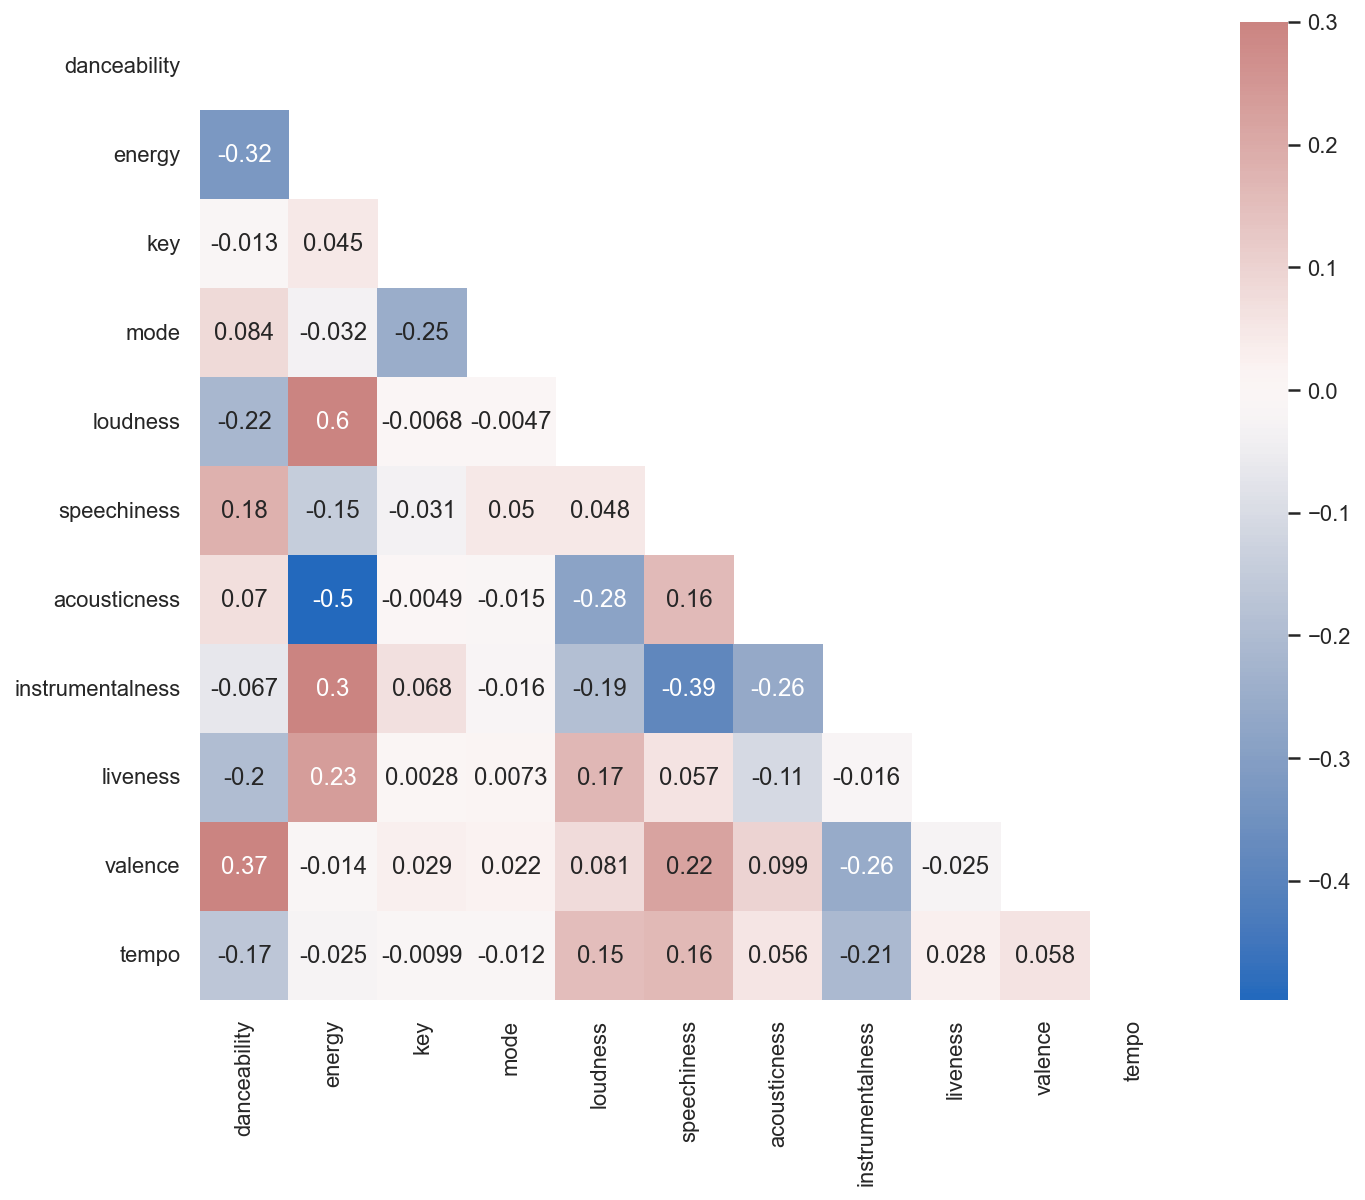

In [15]:
print("Correlation Heatmap with Original Data")

f, ax = plt.subplots(figsize=(11, 9))
mask_1 = np.triu(np.ones_like(org_cluster.corr()))
cmap = sns.color_palette("vlag", as_cmap=True)

sns.heatmap(org_cluster.corr(), mask=mask_1, cmap=cmap, vmax=0.3, center=0, square=True, annot=True)

Looking at our heatmap, we can see that:

Loudness: 
* Higher loudness => higher energy (large positive correlation here, 0.6)

Tempo: 
* Faster the tempo => more speechiness and loudness (small positive correlation, 0.16, 0. 15, respectively)
* Faster tempo => less intrumental (and vise versa) == negative correlation (-0.21)

Valence: 
* Higher (positive valence) => more danceability, speechiness (positive correlation, 0.37)
* Higher (positive valence) => less instrumentalness (negative correlation, -0.26)

Intrumental: 
* More instrumentalness => more energy, or less instrumentalness => less energy (0.3)
* More instrumentalness => less speechiness, or less instrumentaless => more speech (-0.39)

Acousticness:
* More acoustic => less energy, less acoustic => more energy (-0.5; high negative correlation)

Looking at Histogram of the Original Data


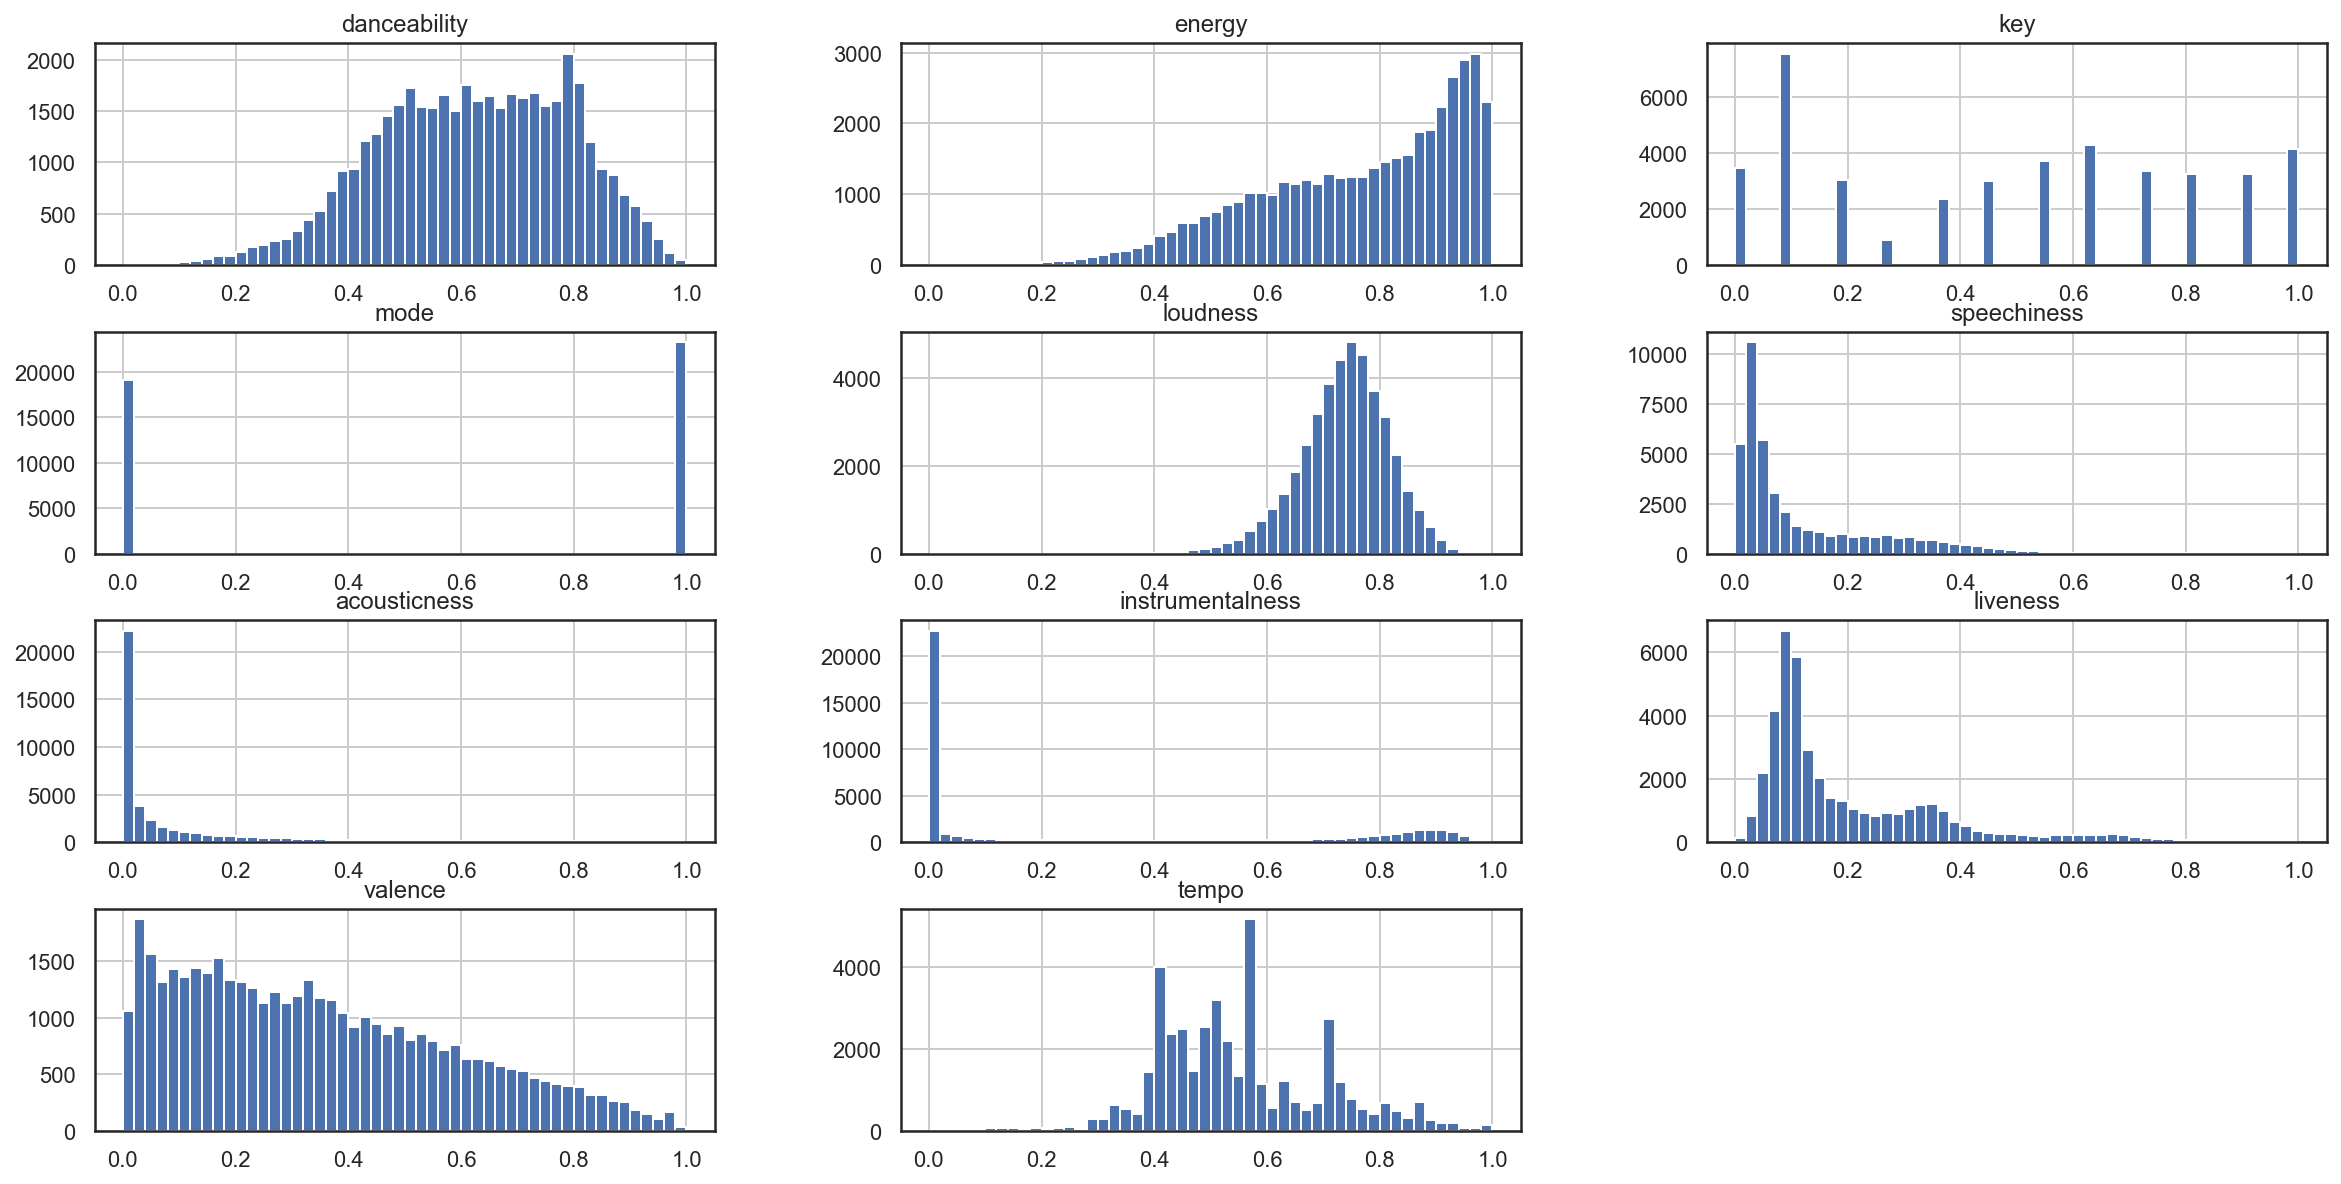

In [16]:
print("Looking at Histogram of the Original Data")
org_cluster.hist(bins=50, figsize=(20,10))
plt.show()

### Dataset after PCA

In [17]:
print("New data points")
new_cluster_PCA = pd.DataFrame(X_hat) # Converting X_hat (from PCA) to dataframe
new_cluster_PCA.columns = columns_cluster
new_cluster_PCA.head(5)

New data points


,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.715890,0.827273,0.405723,1.130679,0.773629,0.192744,0.039035,0.258564,0.069048,0.490023,0.596363
1,0.662275,0.770658,0.528218,1.068310,0.746872,0.173764,0.139980,0.308597,0.241004,0.425505,0.574154
2,0.634021,0.822005,0.477687,1.102369,0.765282,0.164807,0.064597,0.331179,0.212657,0.381041,0.632944
3,0.588189,0.849673,0.377708,1.149256,0.782571,0.146776,0.061047,0.291571,0.071444,0.409783,0.667690
4,0.706002,0.757841,0.396431,1.127353,0.748254,0.210095,0.166057,0.250350,0.218817,0.573534,0.613933


Correlation HeatMap after PCA


<AxesSubplot:>

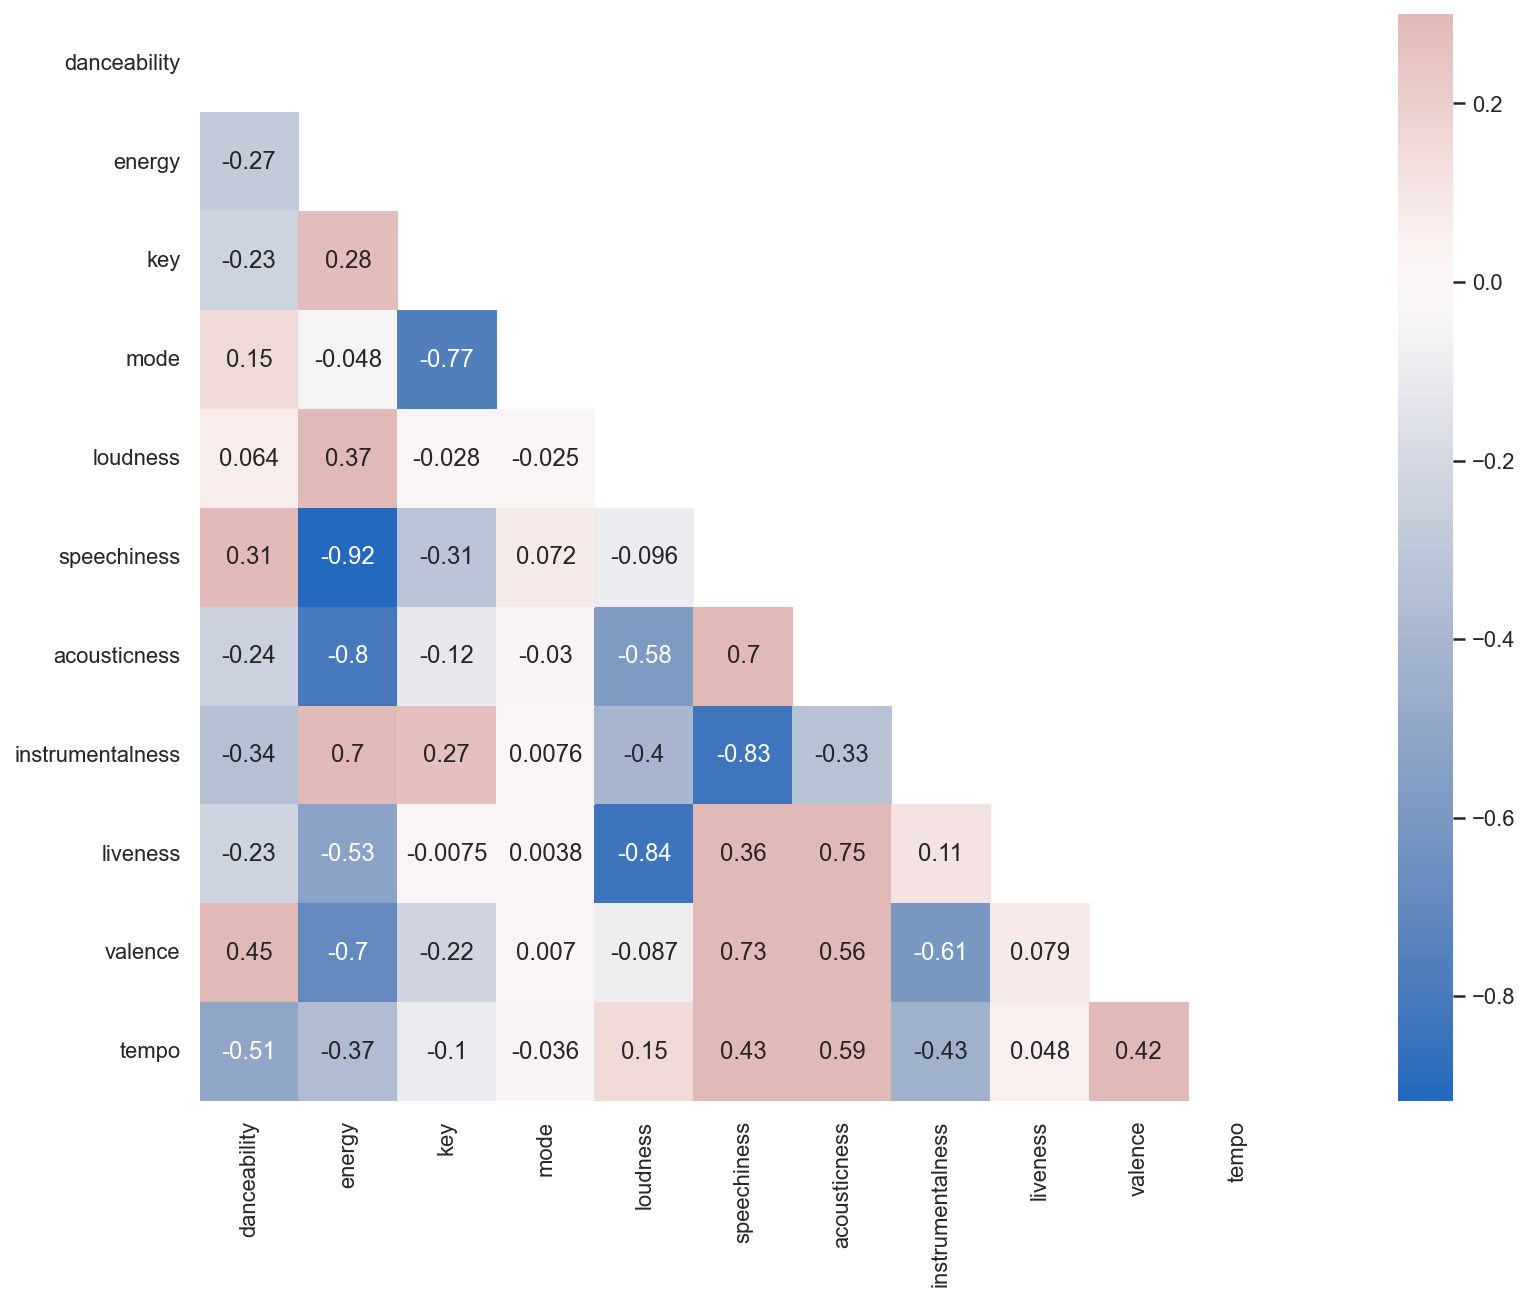

In [18]:
print("Correlation HeatMap after PCA")
mask_2 = np.triu(np.ones_like(new_cluster_PCA.corr()))
sns.heatmap(new_cluster_PCA.corr(), mask=mask_2, cmap=cmap, vmax=0.3, center=0, square=True, annot=True)

Looking at Histogram after running PCA


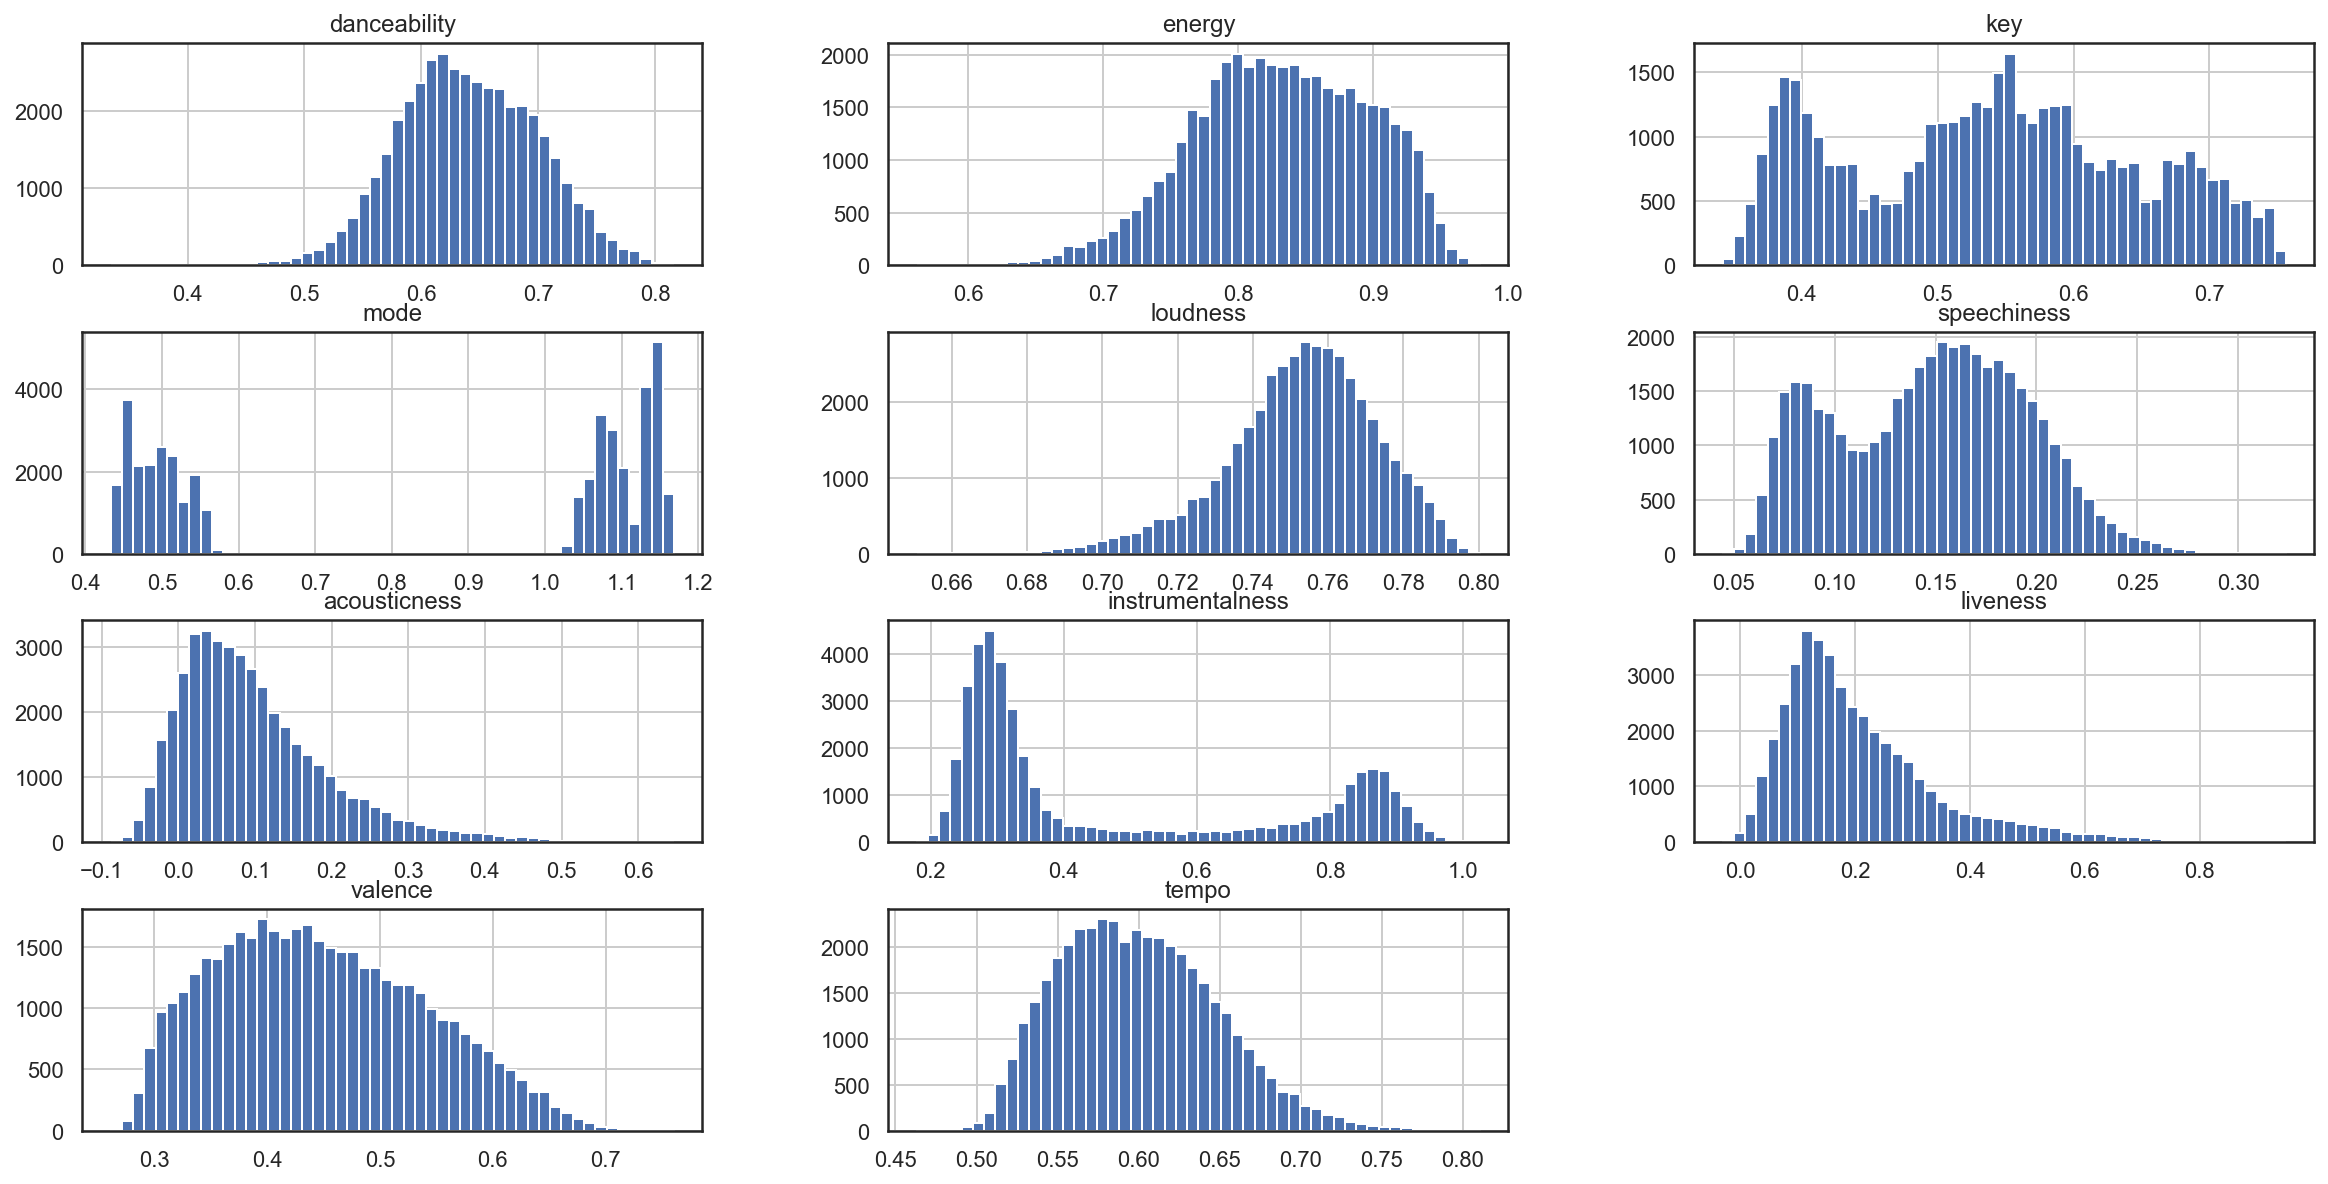

In [19]:
print("Looking at Histogram after running PCA")
new_cluster_PCA.hist(bins=50, figsize=(20,10))
plt.show()

### Scatter between original and dataset after PCA
*Not sure if this is correct thou* 

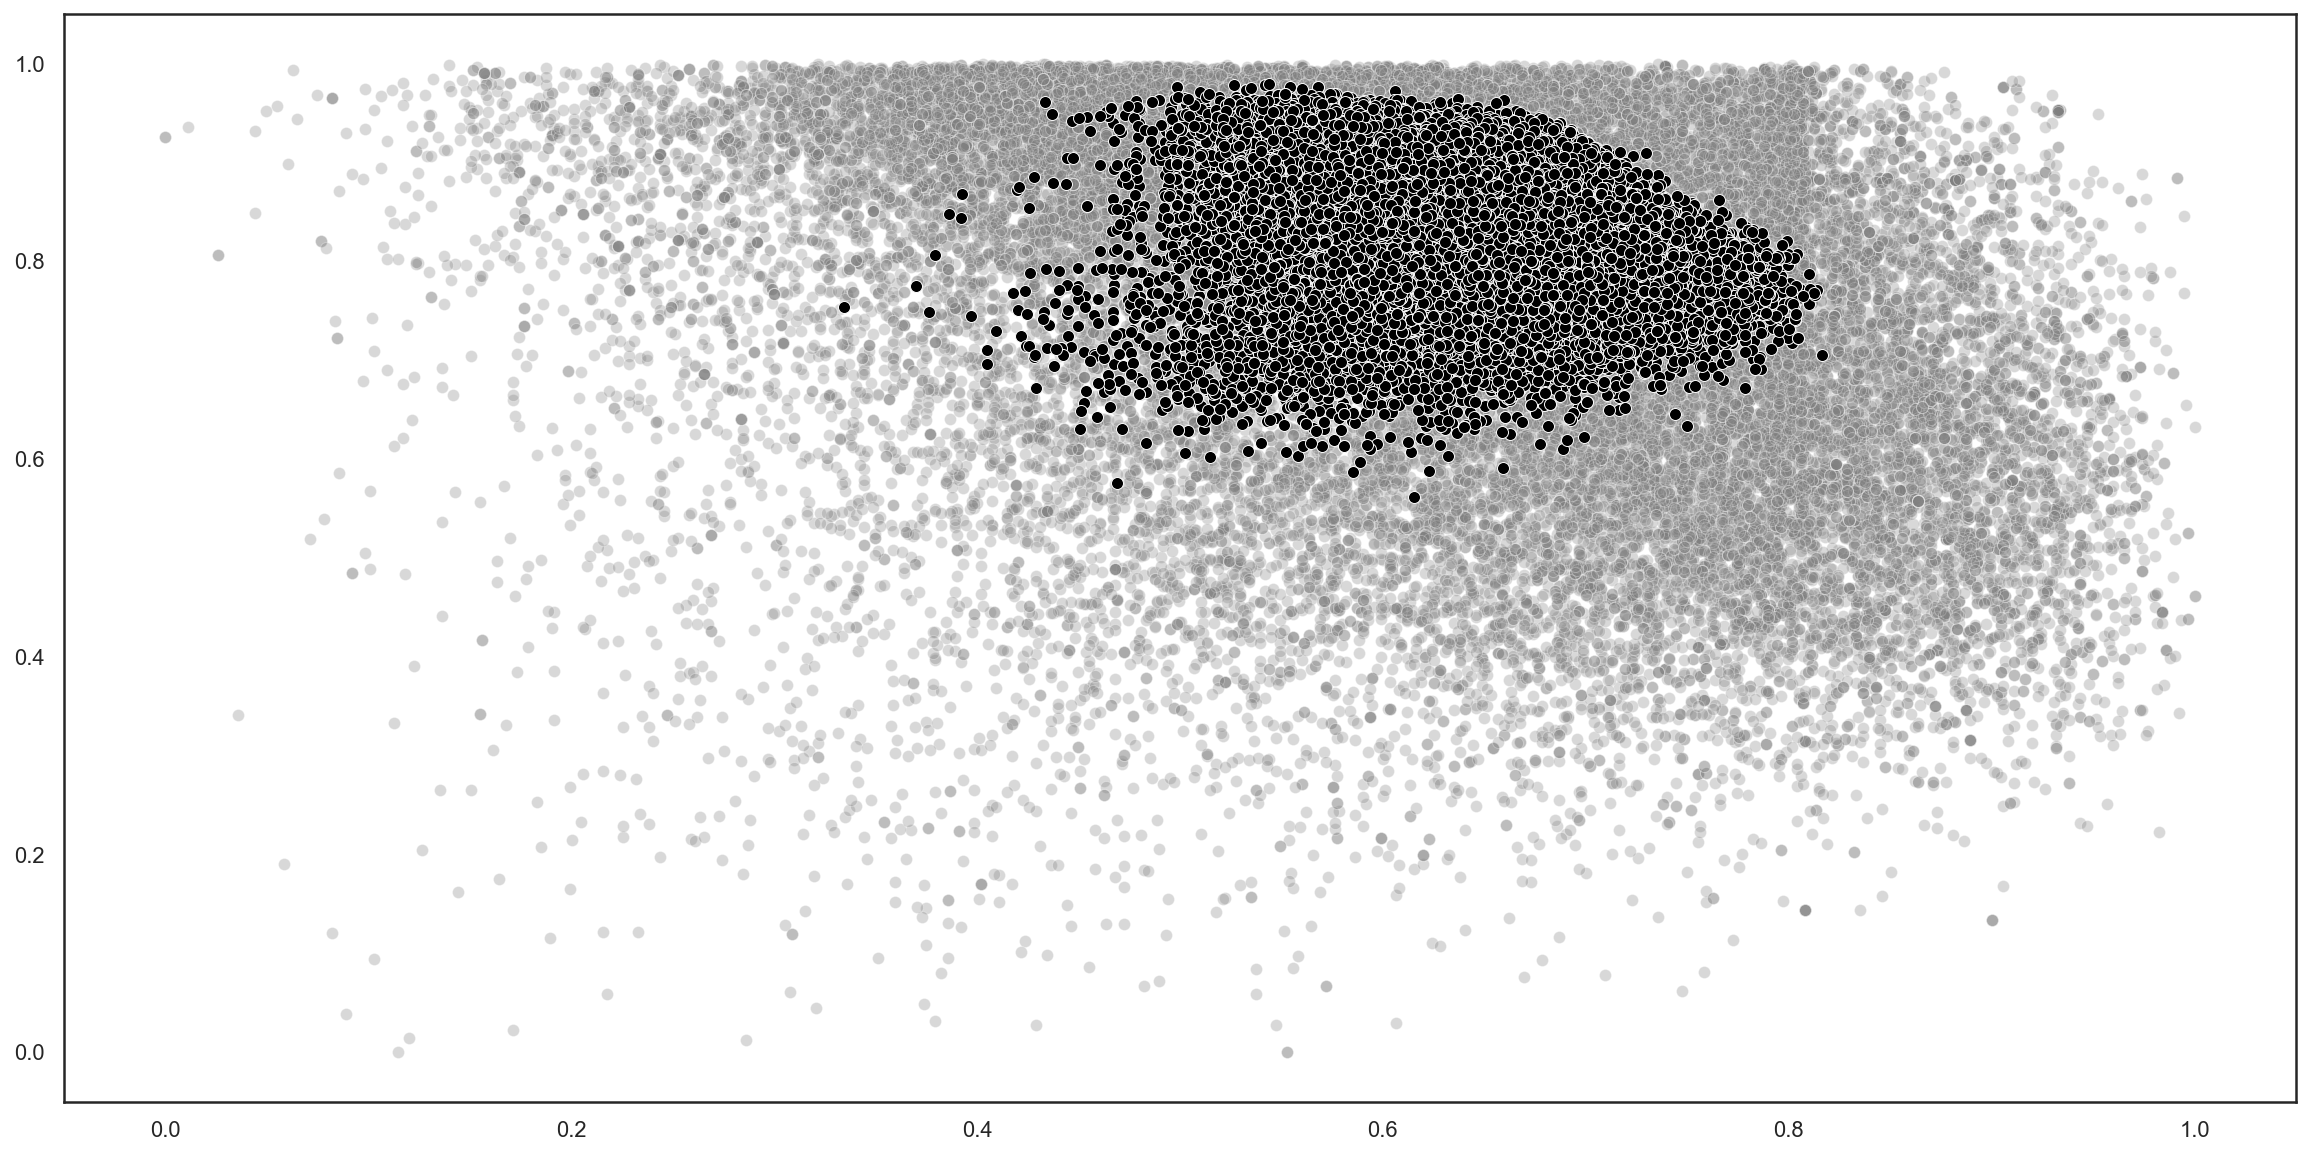

In [20]:
# Testing
ax = sns.scatterplot(x=A[:,0], y=A[:,1], color='grey', alpha=0.3) # Original data points
ax = sns.scatterplot(x=X_hat[:,0], y=X_hat[:,1], color='black')   # New data points

## KMean #1

### Using Original Scaled Dataset

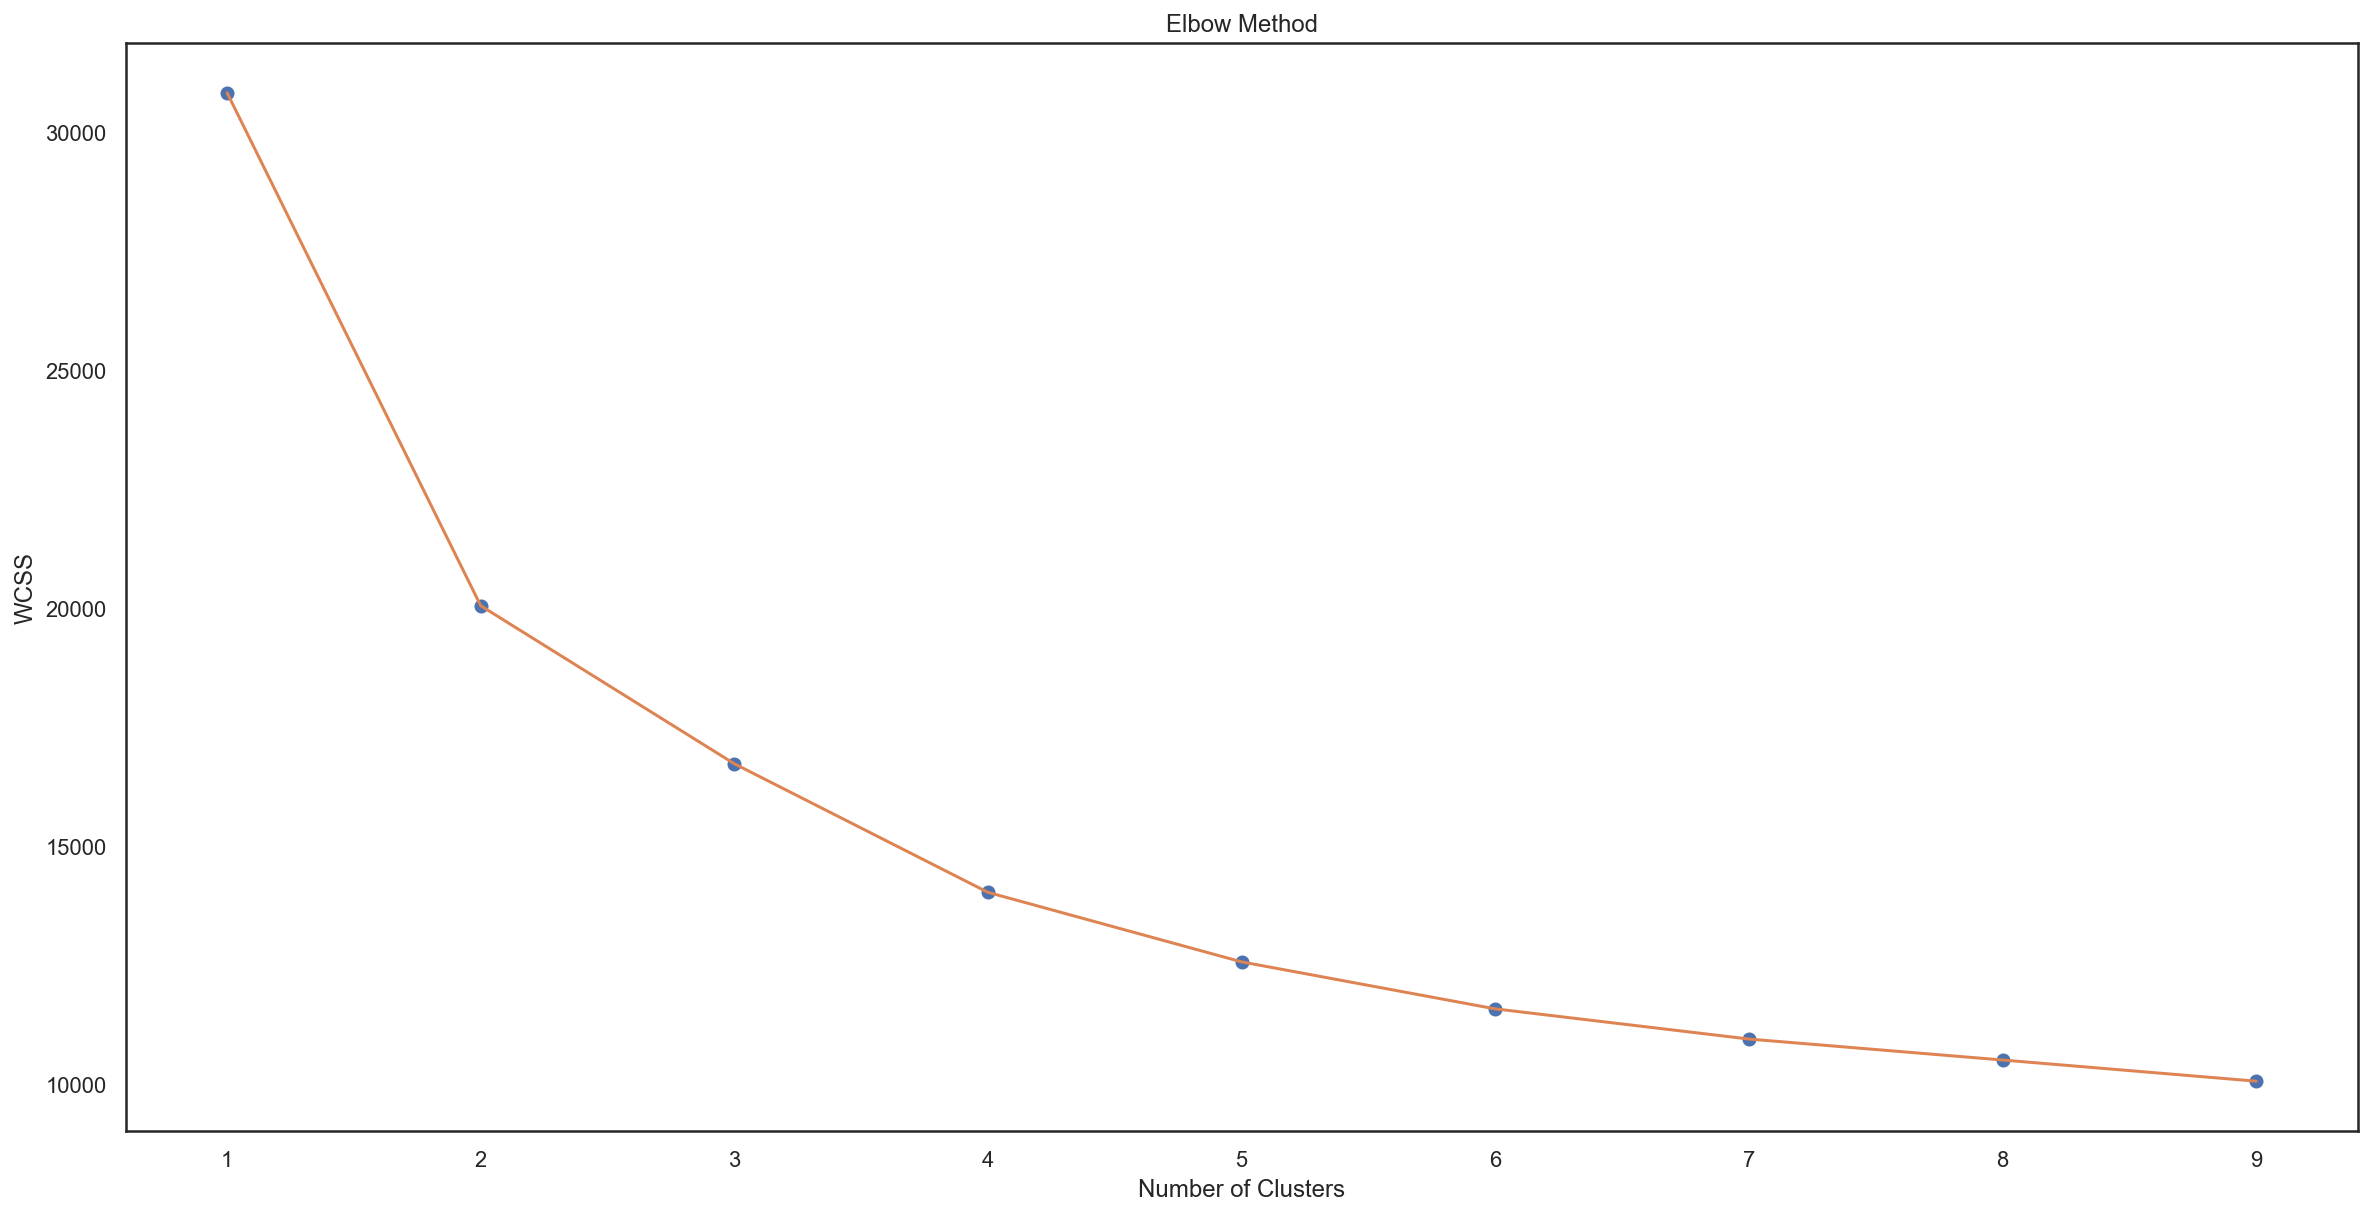

In [21]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(org_cluster)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss, 'o')
plt.plot(range(1, 10), wcss, '-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Testing stuff right now with centroids

In [22]:
centroids_1 = kmeans.cluster_centers_

In [23]:
centroids_1[:,0]

array([0.73588151, 0.6517226 , 0.61703963, 0.47695573, 0.63604132,
       0.61657938, 0.60606797, 0.61171666, 0.5844625 ])

From looking at the WCSS graph, we can see that with 5-6 clusters, we will have a better result. 

In [24]:
# Let's have 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(org_cluster)

In [25]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['KMeans No PCA']

In [26]:
spotify_dataset = pd.concat([spotify_dataset, kmeans], axis=1)

In [27]:
spotify_dataset.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,KMeans No PCA
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,4,Dark Trap,Mercury: Retrograde,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,4,Dark Trap,Pathology,1
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,4,Dark Trap,Symbiote,1
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,4,Dark Trap,Venom,0


In [28]:
# For testing purposes, might not need to worry
org_cluster = pd.concat([org_cluster, kmeans], axis=1)
org_cluster.head()

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans No PCA
0,0.829884,0.813955,0.181818,1.0,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,0
1,0.708527,0.492877,0.727273,1.0,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,1
2,0.850471,0.892974,0.454545,1.0,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,1
3,0.445227,0.780947,0.000000,1.0,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595,0
4,0.794127,0.623909,0.181818,1.0,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579,0


In [29]:
org_cluster.groupby('KMeans No PCA').describe()

danceability                                                    \
                     count      mean       std       min       25%       50%   
KMeans No PCA                                                                  
0                   8356.0  0.650696  0.172030  0.076823  0.522158  0.668436   
1                   7534.0  0.635819  0.178136  0.078990  0.505905  0.650016   
2                   7355.0  0.616993  0.149711  0.011052  0.515657  0.622928   
3                   6529.0  0.591709  0.154802  0.044317  0.482067  0.591505   
4                  12531.0  0.614084  0.177652  0.000000  0.483151  0.618594   

                                    energy            ...   valence            \
                    75%       max    count      mean  ...       75%       max   
KMeans No PCA                                         ...                       
0              0.788710  0.996749   8356.0  0.715483  ...  0.556381  0.991747   
1              0.777874  1.000000   7534.0  0.720848  ...  0.577014  0.991747   
2              0.738867  0.989165   7355.0  0.841504  ...  0.390282  0.991747   
3              0.718279  0.968577   6529.0  0.837033  ...  0.388218  1.000000   
4              0.757829  1.000000  12531.0  0.733548  ...  0.557413  0.990715   

                 tempo                                                    \
                 count      mean       std       min       25%       50%   
KMeans No PCA                                                              
0               8356.0  0.568528  0.160799  0.020589  0.444590  0.566497   
1               7534.0  0.573028  0.161801  0.000000  0.448852  0.566679   
2               7355.0  0.504704  0.101961  0.295978  0.425374  0.492801   
3               6529.0  0.518274  0.113319  0.120913  0.431455  0.493054   
4              12531.0  0.571688  0.156018  0.039206  0.455980  0.566882   

                                   
                    75%       max  
KMeans No PCA                      
0              0.689369  0.999643  
1              0.691452  0.999064  
2              0.542191  0.999150  
3              0.566531  0.998534  
4              0.690370  1.000000  

[5 rows x 88 columns]

In [30]:
# cluster_0 = org_cluster[org_cluster['k_clusters'] == 1]
# cluster_1 = org_cluster[org_cluster['k_clusters'] == 1]
# cluster_2 = org_cluster[org_cluster['k_clusters'] == 2]
# cluster_3 = org_cluster[org_cluster['k_clusters'] == 3]
# cluster_4 = org_cluster[org_cluster['k_clusters'] == 4]

In [31]:
# mask_3 = np.triu(np.ones_like(cluster_0.corr()))
# sns.heatmap(cluster_0.corr(), mask=mask_3, cmap=cmap, vmax=0.3, center=0, square=True, annot=True)

## KMean #2

### Using PCA Scaled Dataset

In [32]:
# Let's have 5 clusters
kmeans_PCA = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans_PCA = kmeans_PCA.fit_predict(new_cluster_PCA)

In [33]:
kmeans_PCA = pd.DataFrame(data=y_kmeans_PCA, dtype=int)
kmeans_PCA.columns = ['KMeans with PCA']

In [34]:
spotify_dataset = pd.concat([spotify_dataset, kmeans_PCA], axis=1)

In [35]:
spotify_dataset.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,KMeans No PCA,KMeans with PCA
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,4,Dark Trap,Mercury: Retrograde,0,2
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,4,Dark Trap,Pathology,1,2
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,4,Dark Trap,Symbiote,1,2
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0,2
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,4,Dark Trap,Venom,0,2


In [36]:
new_cluster_PCA = pd.concat([new_cluster_PCA, kmeans_PCA], axis=1)
new_cluster_PCA.head(5)

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans with PCA
0,0.715890,0.827273,0.405723,1.130679,0.773629,0.192744,0.039035,0.258564,0.069048,0.490023,0.596363,2
1,0.662275,0.770658,0.528218,1.068310,0.746872,0.173764,0.139980,0.308597,0.241004,0.425505,0.574154,2
2,0.634021,0.822005,0.477687,1.102369,0.765282,0.164807,0.064597,0.331179,0.212657,0.381041,0.632944,2
3,0.588189,0.849673,0.377708,1.149256,0.782571,0.146776,0.061047,0.291571,0.071444,0.409783,0.667690,2
4,0.706002,0.757841,0.396431,1.127353,0.748254,0.210095,0.166057,0.250350,0.218817,0.573534,0.613933,2


In [37]:
new_cluster_PCA.groupby('KMeans with PCA').describe()

danceability                                          \
                       count      mean       std       min       25%   
KMeans with PCA                                                        
0                     6564.0  0.608688  0.052243  0.334210  0.573364   
1                     7512.0  0.624737  0.050214  0.405099  0.591538   
2                    11328.0  0.668345  0.055899  0.473440  0.627024   
3                    12496.0  0.642052  0.057591  0.409163  0.601383   
4                     4405.0  0.635609  0.059613  0.404975  0.596636   

                                                energy            ...  \
                      50%       75%       max    count      mean  ...   
KMeans with PCA                                                   ...   
0                0.606610  0.645872  0.751642   6564.0  0.893737  ...   
1                0.622989  0.661002  0.764920   7512.0  0.891566  ...   
2                0.669863  0.710361  0.810393  11328.0  0.820952  ...   
3                0.639246  0.683649  0.816300  12496.0  0.805263  ...   
4                0.637499  0.677215  0.804427   4405.0  0.742942  ...   

                  valence              tempo                                \
                      75%       max    count      mean       std       min   
KMeans with PCA                                                              
0                0.419301  0.635771   6564.0  0.574899  0.038803  0.487958   
1                0.419038  0.651513   7512.0  0.569489  0.035917  0.491939   
2                0.521043  0.690650  11328.0  0.604082  0.042595  0.467600   
3                0.544799  0.760779  12496.0  0.615497  0.046075  0.463044   
4                0.583231  0.745091   4405.0  0.634576  0.053349  0.472635   

                                                         
                      25%       50%       75%       max  
KMeans with PCA                                          
0                0.545582  0.569338  0.599437  0.804315  
1                0.542994  0.564662  0.589101  0.756163  
2                0.572701  0.603331  0.634421  0.764854  
3                0.582425  0.614786  0.646022  0.804386  
4                0.596857  0.634175  0.670885  0.810664  

[5 rows x 88 columns]

In [38]:
# checking the songs in the cluster
spotify_dataset.loc[spotify_dataset['KMeans with PCA'] == 0][:5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,KMeans No PCA,KMeans with PCA
33,0.455,0.525,5,-12.692,0,0.0455,0.136000,0.734,0.1250,0.2790,119.999,2Tu4kHEeIVFn6Re2ybm2lQ,4,Dark Trap,OhNo!,3,0
51,0.668,0.479,10,-7.321,0,0.0436,0.061200,0.408,0.1200,0.1020,162.120,1NJel5c5LSc9Ac7UAeoJtp,4,Dark Trap,Centipede,3,0
97,0.713,0.839,4,-6.377,0,0.3490,0.004170,0.706,0.1060,0.0369,150.004,0FP2R9giDksk3a1GUQLfOz,4,Dark Trap,As Above so Look out Below,3,0
207,0.851,0.634,11,-8.672,0,0.1960,0.260000,0.882,0.0766,0.0399,135.017,67lnnsYIuwF3cFmweH0DgS,4,Dark Trap,Trench Coat,3,0
307,0.635,0.793,10,-4.333,0,0.0322,0.000647,0.747,0.1130,0.2810,155.188,3CDVMejYHnB1SkEEx0T1N4,4,Dark Trap,Many Men,3,0


In [39]:
# checking the songs in the cluster
spotify_dataset.loc[spotify_dataset['KMeans with PCA'] == 1][:5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,genre,song_name,KMeans No PCA,KMeans with PCA
46,0.468,0.325,1,-8.267,1,0.2450,0.1150,0.726,0.1090,0.0387,191.186,2Iwf4sAnEgkuxxnJ61du8z,3,Dark Trap,Claustrophobia,2,1
72,0.781,0.493,1,-7.649,1,0.0522,0.0717,0.586,0.1230,0.0383,212.022,0kCfKToIFZFQQAaSQHcjRL,4,Dark Trap,LTE,2,1
77,0.810,0.524,5,-6.705,1,0.0441,0.0444,0.714,0.1050,0.1550,122.016,7EnGzsqQi0bAVGQw8i4WIQ,4,Dark Trap,A Death In The Ocean Would Be Beautiful,2,1
89,0.860,0.524,11,-4.698,1,0.0729,0.5780,0.960,0.0993,0.1420,114.946,6rF4PCqJq0p4MAWgecwfIl,4,Dark Trap,Caligula,2,1
108,0.708,0.298,7,-16.427,1,0.0578,0.6980,0.772,0.3040,0.1180,124.863,2JUs4EVimq0ShpPeIgeokl,4,Dark Trap,HDMI,2,1
